In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x):
    return sigmoid(x)*(1 - sigmoid(x))

def mse(y_true, y_pred):
    return np.sum(np.power(y_pred - y_true, 2))

def d_mse(output, y):
    return 2 * (output - y)

In [3]:
class Layer:
    def __init__(self, size_in, size_out):
        self.size_in = size_in
        self.size_out = size_out

        self.w = np.random.randn(size_in, size_out) - 0.5
        self.b = np.random.randn(1) - 0.5

    def for_prop(self, x):

        z = np.dot(x, self.w) + self.b

        self.a = sigmoid(z)
        self.da = d_sigmoid(z)

        return self.a

In [4]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.history = []

    def add(self, size_in, size_out):
        self.layers.append(Layer(size_in, size_out))

    def predict(self, x):
        accum = x
        for layer in self.layers:
            accum = layer.for_prop(accum)
        return accum
    
    def train(self, x, y, epochs = 10000, rate = 0.1):
        for epoch in range(epochs):
            epoch_history = []
            for i in range(len(x)):
                
                # Calculate the predicted value and 
                # the derivative of the loss function
                output = self.predict(x[i])
                error = d_mse(output, y[i])
                epoch_history.append(mse(output, y[i]))

                # Calculate the gradients, starting with the output layer
                # and then looping through the remaining layers
                d_output = error * self.layers[-1].da
                dy = [d_output]
                for j in reversed(range(len(self.layers) - 1)):
                    dy.insert(0, np.dot(dy[0], self.layers[j + 1].w.transpose()) * self.layers[j].da)

                # Create list of activation levels, starting with the input layer
                # and then the remaining layers
                activation_levels = [x[i].reshape(-1, 1)]
                for layer in self.layers:
                    activation_levels.append(layer.a.reshape(-1, 1))

                # Loop backwards through the layers and 
                # and multiply gradient of each activation level
                # updating the weights and biases accordingly
                for j in reversed(range(len(self.layers))):
                    #print(activation_levels[j])
                    #print(dy[j].reshape(1, -1))
                    self.layers[j].w -= rate * np.dot(activation_levels[j], dy[j].reshape(1, -1))
                    self.layers[j].b -= rate * dy[j].sum()
            #print(str(np.round(epoch/epochs * 100, 2)) + "%")
            self.history.append(np.mean(epoch_history))

In [7]:
# Example usage:
model = Network()
model.add(2, 5)
model.add(5, 1)

X = np.array([[1, 1],
              [1, 0],
              [0, 1],
              [0, 0]])
Y = np.array([[0], [1], [1], [0]])

model.train(X, Y, epochs = 10000, rate = 0.1)

model.predict(X)

array([[0.03495232],
       [0.96801114],
       [0.9709478 ],
       [0.02253447]])

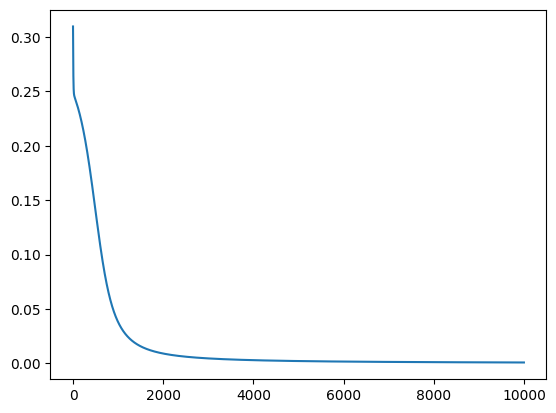

In [8]:
plt.plot(model.history)

In [9]:
model.history[-1]

0.0008997891699128009

In [11]:
from sklearn.datasets import make_classification
import pandas as pd

features, target = make_classification(n_samples = 100,
                                       n_features = 10,
                                       n_informative = 10,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [0.3, 0.7],
                                       random_state = 42)

In [12]:
model = Network()
model.add(10, 5)
model.add(5, 1)
#model.add(1000, 1)

X = features
Y = target

model.train(X, Y, epochs = 100, rate = 0.1)

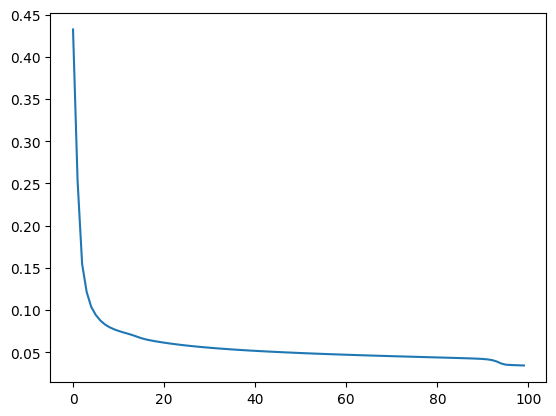

In [13]:
plt.plot(model.history)

In [14]:
model.history[-1]

0.034186669779388376